In [56]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

In [136]:
from collections import defaultdict

def find_repeated_strings_with_positions(arr):
    # Dictionary to store each string and its positions
    string_positions = defaultdict(list)
    
    # Iterate through the array with indices
    for i, tup in enumerate(arr):
        for j, string in enumerate(tup):
            # Store position as (row_index, column_index)
            string_positions[string].append((i, j))
    
    # Filter only strings that appear more than once
    repeated_strings = {string: positions for string, positions in string_positions.items() 
                      if len(positions) > 1}
    
    return repeated_strings

def assign_repeated(result):
    repeated = find_repeated_strings_with_positions(result['names'])
    assig = {}
    for x in repeated.keys():
        best = 1
        best_cluster = None
        for gene, cluster in repeated[x]:
            if result["pvals_adj"][gene][cluster]<best:
                best = result["pvals_adj"][gene][cluster]
                best_cluster = cluster
        assig[x] = best_cluster
    return assig

def entropy(cells, labels):
    ent = 0
    for cat in set(labels):
        p = np.sum(np.array(labels)[cells]==cat)/len(cells)
        if p != 0:
            ent = ent + p*np.log2(p)
    return -ent

In [99]:
# amb el txt file

import json
from Tree import Node
import numpy as np
import scanpy as sc
import pickle
import pandas as pd

adata = sc.datasets.ebi_expression_atlas("E-MTAB-10553")

with open('tree.json', 'r') as f:
    data_tree = json.load(f)

tree = Node()
tree.from_json(data_tree)

for level in range(1, tree.get_tree_depth() + 1):
    print('Level:', level)
    colors = np.zeros(len(tree.cells)) - 1
    c = 0
    color_dict = {}
    for node in tree.get_nodes_at_level(level + 1):
        colors[node.cells] = str(c)
        color_dict[c] = node.type
        c = c + 1
        print('Node:', node.type)

    # Adding our new cluster labels to the annotated data
    adata.obs["Class_own"] = pd.Categorical(colors)

    # Differential expression analysis with the new annotation
    sc.tl.rank_genes_groups(adata, groupby='Class_own', method='wilcoxon',n_genes=15)

    # Access the results of differential expression analysis
    result = adata.uns['rank_genes_groups']
    
    assig = assign_repeated(result)

    fname = f"level_{level}.txt"
    with open(fname, "w") as f:
        for cluster_id in set(colors):
            if cluster_id == -1:  # Skip unassigned cells
                continue
            cluster_id_int = int(cluster_id)
            marker_genes = result['names'][str(cluster_id)]
            cluster_name = color_dict[cluster_id_int]
            genename = f"level_{level}_cluster_{cluster_name}"
            fname_cluster = genename+".txt"

            with open (fname_cluster,"w") as fn:
                for i,gene in enumerate(marker_genes):
                    if gene in assig:
                        if assig[gene] != cluster_id_int:
                            continue

                    if result["pvals_adj"][str(cluster_id)][i]<0.05:
                        fn.write(gene + "\t" + "Cluster_"+str(cluster_name)+'\n')
                    else:
                        print("gen skipped")

            for i,gene in enumerate(marker_genes):
                if gene in assig:
                    if assig[gene] != cluster_id_int:
                        continue
                if result["pvals_adj"][str(cluster_id)][i]<0.05:
                    f.write(gene + "\t" + genename+'\n')

Level: 1
Node: B
Node: J


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


Level: 2
Node: C
Node: I
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


Level: 3
Node: D
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


Level: 4
Node: E
Node: 6
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


Level: 5
Node: F
Node: 5
Node: 6
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
Level: 6
Node: G
Node: 4
Node: 5
Node: 6
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
Level: 7
Node: H
Node: 3
Node: 4
Node: 5
Node: 6
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
Level: 8
Node: 1
Node: 2
Node: 3
Node: 4
Node: 5
Node: 6
Node: 7
Node: 8
Node: 9
Node: 10
Node: 11
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped
gen skipped


c:\Users\bruna\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


Entropy in root:  2.5802443836778566
Entropy in Level  1 : 2.3820339822259635
Entropy in Level  2 : 1.9902626896234517
Entropy in Level  3 : 1.684762757097317
Entropy in Level  4 : 1.682715194101604
Entropy in Level  5 : 1.681254837266141
Entropy in Level  6 : 1.6792301915984382
Entropy in Level  7 : 1.6790138642135992
Entropy in Level  8 : 1.676803069259985


Text(0.5, 0, 'Level')

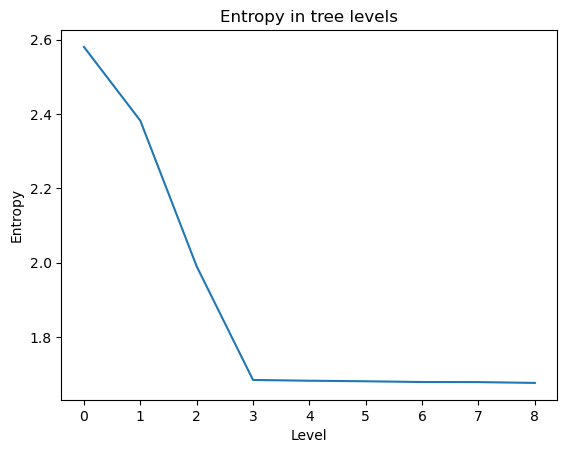

In [142]:
import json
from Tree import Node
import numpy as np
import scanpy as sc
import pickle
import pandas as pd
import math
import matplotlib.pyplot as plt

adata = sc.datasets.ebi_expression_atlas("E-MTAB-10553")
labels = sc.get.obs_df(adata, keys="Factor Value[inferred cell type - authors labels]")
labels = ['nan' if not isinstance(x[0],str) and math.isnan(x[0]) else x[0] for x in labels.values]

with open('tree.json', 'r') as f:
    data_tree = json.load(f)

tree = Node()
tree.from_json(data_tree)

plot = []
initial_entropy = entropy(list(range(len(labels))), labels)
plot.append(initial_entropy)
print("Entropy in root: ",initial_entropy)

for level in range(1, tree.get_tree_depth() + 1):
    colors = np.zeros(len(tree.cells)) - 1
    c = 0
    color_dict = {}
    total_entropy = 0
    for node in tree.get_nodes_at_level(level + 1):
        colors[node.cells] = str(c)
        color_dict[c] = node.type
        c = c + 1
        total_entropy = total_entropy + entropy(node.cells, labels)*len(node.cells)/len(labels)
    plot.append(total_entropy)
    print('Entropy in Level ', level, ":",total_entropy)

plt.plot(plot)
plt.title("Entropy in tree levels")
plt.ylabel("Entropy")
plt.xlabel("Level")